<h1 style="color:rgb(0,120,170)"> PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}=\{ \mathbf{x}_1,...,\mathbf{x}_n \}$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>


 $$<Ca,a> = <\frac1n \sum_{i=1}^n x_{is} x_{it}a,a> $$
 
 
 $$<Ca,a> = (\frac1n \sum_{i=1}^n x_{is} x_{it}a)^Ta$$
 
and then, we can rewrite it as below:

$$ <Ca,a> = a^T (\frac1n \sum_{i=1}^n x_{is} x_{it})^T a $$

Hence, the real symmetric $ N x N $ matrix $C$ is said to be positive semidefinite as it is already defined in this question. 

So, the real symmetric matrix $C$ is positive definite if and only if its eigenvalues are positive. It is positive semidefinite if and only if its eigenvalues are nonnegative.



* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 

Let suppose that $ Ca = \lambda a $. 
So, $ 0 \le a^TCa = \lambda a^Ta$. Since $a^Ta $ is the positive for all $a$, which implies $\lambda$ is non-negative.

* Why is this an important fact in PCA? 

Let say C is $ N x N $ matrix and if it holds for some nonzero vector a and scalar $\lambda$. Then, we can determine that $a$ is an eigenvector of $C$ that is corresponding to the eigenvectors of $C$ and the its corresponding elements of the diagonal are the corresponding eigenvalues.
So, eignenvalues does not determine eigenvectors uniquely.
The equation of $ (C - \lambda I)a = 0 $ always has multiple solutions. Hence, any non-zero scalar multople f an eigenvector is an eigenvector. Following the fact, any linear combination of eigenvectors corresponding to the same eigenvalue is an eigenvector.

<h2 style="color:rgb(0,120,170)">Task 2: PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

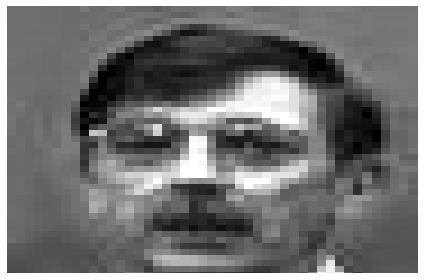

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(0,120,170)">Task:</h3>

* We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [3]:
################################
# Begin your code

pca_50 = PCA(.50).fit(data)
pca_75 = PCA(.75).fit(data)
pca_99 = PCA(.90).fit(data)
# End your code
################################

In [4]:
print('with 50 % explained of the variance, number of PCA components : ',pca_50.n_components_)
print('with 50 % explained of the variance, explained variance of each component : ', pca_50.explained_variance_)
print('with 50 % explained of the variance, ratio of each component : ', pca_50.explained_variance_ratio_)
print('with 50 % explained of the variance, ratio sum : ', pca_50.explained_variance_ratio_.cumsum())

with 50 % explained of the variance, number of PCA components :  4
with 50 % explained of the variance, explained variance of each component :  [24.54673934 12.04191594  6.14383129  4.20519489]
with 50 % explained of the variance, ratio of each component :  [0.26889478 0.13191195 0.06730198 0.04606538]
with 50 % explained of the variance, ratio sum :  [0.26889478 0.40080673 0.46810871 0.51417409]


In [5]:
print('with 75 % explained of the variance, number of PCA components : ',pca_75.n_components_)
print('with 75 % explained of the variance, explained variance of each component : ', pca_75.explained_variance_)
print('with 75 % explained of the variance, ratio of each component : ', pca_75.explained_variance_ratio_)
print('with 75 % explained of the variance, ratio sum : ', pca_75.explained_variance_ratio_.cumsum())

with 75 % explained of the variance, number of PCA components :  18
with 75 % explained of the variance, explained variance of each component :  [24.54673934 12.04191594  6.14383129  4.20519489  3.3144827   2.88860908
  2.67383988  2.12591657  1.72828225  1.48053995  1.42158627  1.19116892
  1.09925142  1.04978474  0.85944387  0.83685181  0.73317891  0.69268599]
with 75 % explained of the variance, ratio of each component :  [0.26889478 0.13191195 0.06730198 0.04606538 0.03630817 0.03164298
 0.02929031 0.02328814 0.01893229 0.01621843 0.01557262 0.01304854
 0.01204164 0.01149976 0.00941469 0.00916721 0.00803153 0.00758796]
with 75 % explained of the variance, ratio sum :  [0.26889478 0.40080673 0.46810871 0.51417409 0.55048225 0.58212523
 0.61141554 0.63470368 0.65363597 0.6698544  0.68542702 0.69847556
 0.7105172  0.72201696 0.73143165 0.74059886 0.74863039 0.75621835]


In [6]:
print('with 99 % explained of the variance, number of PCA components : ',pca_99.n_components_)
print('with 99 % explained of the variance, explained variance of each component : ', pca_99.explained_variance_)
print('with 99 % explained of the variance, ratio of each component : ', pca_99.explained_variance_ratio_)
print('with 99 % explained of the variance, ratio sum : ', pca_99.explained_variance_ratio_.cumsum())

with 99 % explained of the variance, number of PCA components :  61
with 99 % explained of the variance, explained variance of each component :  [24.54673934 12.04191594  6.14383129  4.20519489  3.3144827   2.88860908
  2.67383988  2.12591657  1.72828225  1.48053995  1.42158627  1.19116892
  1.09925142  1.04978474  0.85944387  0.83685181  0.73317891  0.69268599
  0.66415053  0.63279975  0.57575302  0.57164139  0.55016219  0.52883875
  0.4950089   0.4643278   0.4524728   0.43379322  0.42051898  0.38842654
  0.37223454  0.34956237  0.3361258   0.31750513  0.3101642   0.30658915
  0.2828195   0.27589235  0.2697565   0.26188287  0.25562449  0.24044724
  0.23962916  0.22642877  0.2240865   0.21687295  0.20479659  0.19918826
  0.19500711  0.18342959  0.17927193  0.17684541  0.17237373  0.16784475
  0.16399498  0.16257362  0.16074192  0.15592576  0.15202144  0.14785535
  0.14572112]
with 99 % explained of the variance, ratio of each component :  [0.26889478 0.13191195 0.06730198 0.04606538 0.

<h3 style="color:rgb(0,120,170)">Task:</h3>

* You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [7]:
pca_50_com = pca_50.transform(data)
pca_75_com = pca_75.transform(data)
pca_99_com = pca_99.transform(data)

print("transformed shape of 50%:", pca_50_com.shape)
print("transformed shape of 75%:", pca_75_com.shape)
print("transformed shape of 99%:", pca_99_com.shape)

transformed shape of 50%: (3059, 4)
transformed shape of 75%: (3059, 18)
transformed shape of 99%: (3059, 61)


In [8]:
################################
# Begin your code

pca_50_reduction = pca_50.transform(data)
pca_75_reduction = pca_75.transform(data)
pca_99_reduction = pca_99.transform(data)

print("transformed shape of 50%:", pca_50_reduction.shape)
print("transformed shape of 75%:", pca_75_reduction.shape)
print("transformed shape of 99%:", pca_99_reduction.shape)


# End your code
################################

transformed shape of 50%: (3059, 4)
transformed shape of 75%: (3059, 18)
transformed shape of 99%: (3059, 61)


In [9]:
pca_50_inverse = pca_50.inverse_transform(pca_50_com)
pca_75_inverse = pca_75.inverse_transform(pca_75_com)
pca_99_inverse = pca_99.inverse_transform(pca_99_com)

print(pca_50_inverse.shape)
print(pca_75_inverse.shape)
print(pca_99_inverse.shape)

(3059, 2250)
(3059, 2250)
(3059, 2250)


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

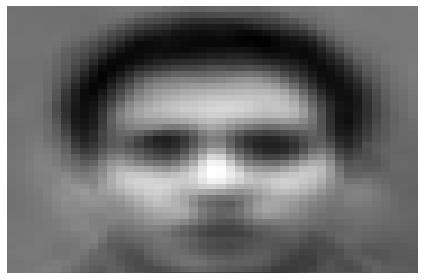

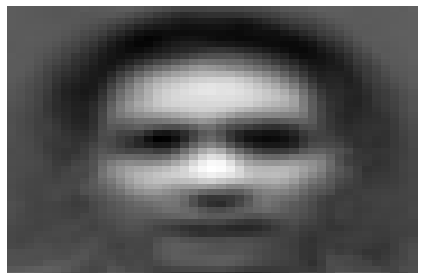

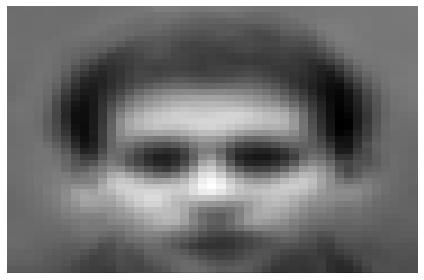

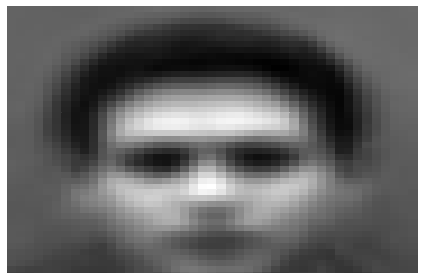

In [10]:
# Plot 50% of explained variance images

for i in range(4):
    plotImg(pca_50_inverse[i])


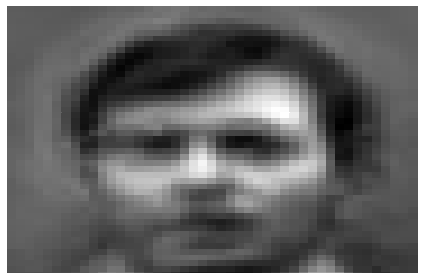

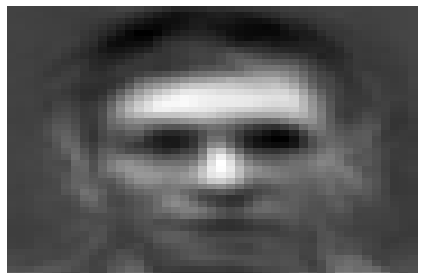

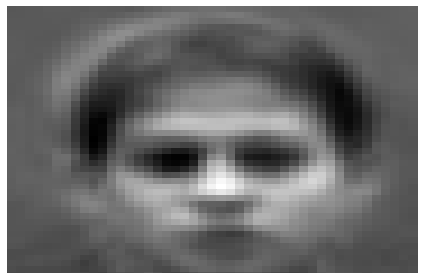

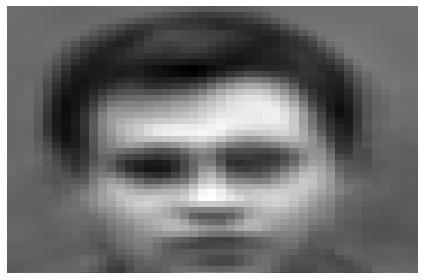

In [11]:
# Plot 75% of explained variance images

for i in range(4):
    plotImg(pca_75_inverse[i])


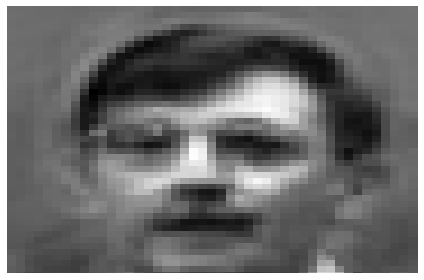

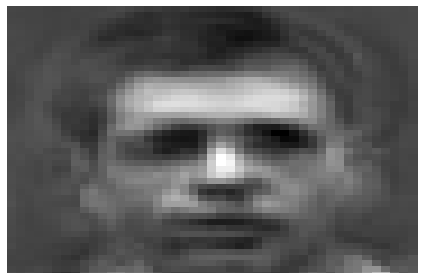

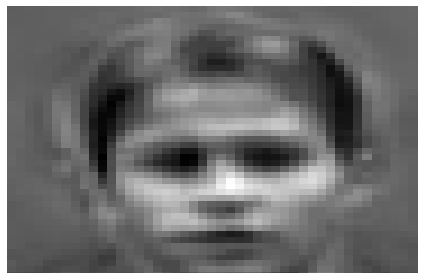

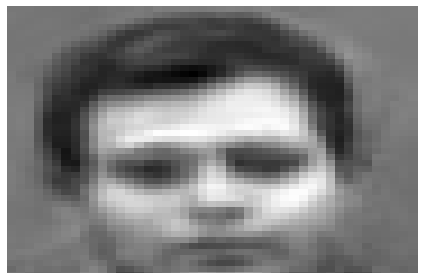

In [12]:
# Plot 99% of explained variance images

for i in range(4):
    plotImg(pca_99_inverse[i])


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Comment on your observations. What type of information is preserved, what is lost?

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

According to the results of the experiment, we could easily know that the images with 50% explained variances are more blurry compared to two explained_variances. With 50% explained varinces, the number of components is 4. As a result, we can only obtain limited information which is most important information, shape of human face in this experiment.

On the other hand, the number of its components of 99% explained variance is 61. Due to its high dimensionality, it is able to contain more information and plot a clear and detailed image of each face, enough to distinguish different person. 





<h2 style="color:rgb(0,120,170)">Task 3: PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [13]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

In [14]:
data4_data = data4[:,:-1]
data4_label = data4[:,-1]

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

<h3 style="color:rgb(208,90,80)">Code (10 Points):</h3>

In [15]:
################################
# Begin your code

# PCA for data3

pca = PCA() 
  
data3_pca = pca.fit_transform(data3) 
data3_explained_var = pca.explained_variance_ratio_
# End your code
################################

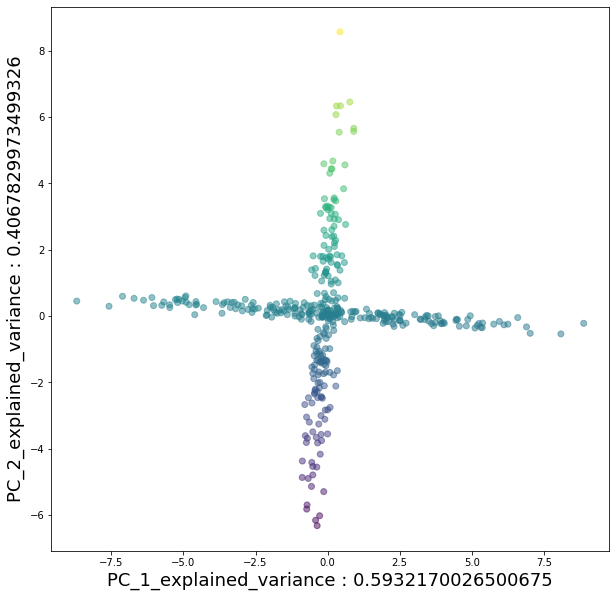

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data3_pca[:,0],data3_pca[:,1], c=data3_pca[:,1],alpha=0.5)
plt.xlabel('PC_1_explained_variance : ' + str(data3_explained_var[0]),fontsize=18)
plt.ylabel('PC_2_explained_variance : '+str(data3_explained_var[1]),fontsize=18)
plt.show()  

In [17]:
################################
# Begin your code

# PCA for data4

pca = PCA() 
  
data4_pca = pca.fit_transform(data4_data) 
data4_explained_var = pca.explained_variance_ratio_

# End your code
################################

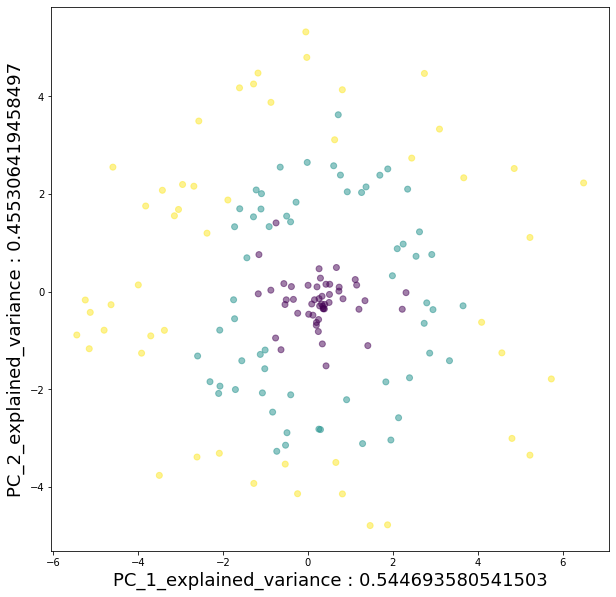

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data4_pca[:,0],data4_pca[:,1], c=data4_label,alpha=0.5)
plt.xlabel('PC_1_explained_variance : ' + str(data4_explained_var[0]),fontsize=18)
plt.ylabel('PC_2_explained_variance : '+str(data4_explained_var[1]),fontsize=18)
plt.show()  

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection on the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

<h3 style="color:rgb(208,90,80)">Code (20 Points):</h3>

In [19]:
################################
# Begin your code

# Kernel PCA for data3 with polynomial kernel + Visualization

kpca_poly = KernelPCA(kernel = 'poly', gamma=2, degree=3)
data3_kpca_poly = kpca_poly.fit_transform(data3)

# End your code
################################

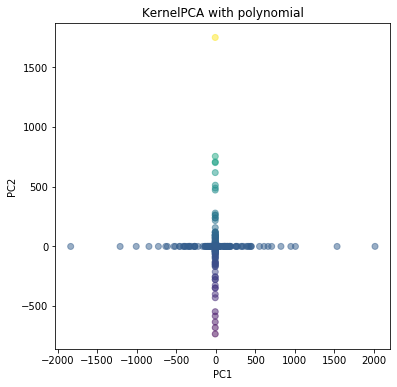

In [20]:

plt.figure(figsize=(6, 6))
plt.title("KernelPCA with polynomial")
plt.scatter(data3_kpca_poly[:,0],data3_kpca_poly[:,1], c=data3_kpca_poly[:,1] , alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [21]:
################################
# Begin your code

# Kernel PCA for data3 with RBF-kernel + Visualization

kpca_rbf = KernelPCA(kernel = 'rbf', gamma=0.25)
data3_kpca_rbf = kpca_rbf.fit_transform(data3)

# End your code
################################

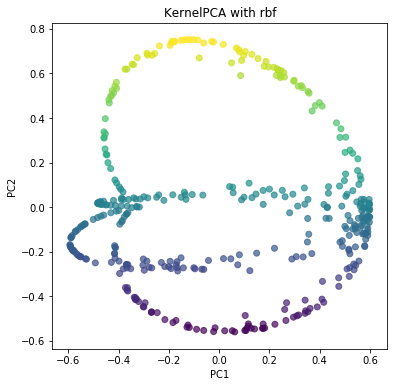

In [22]:
plt.figure(figsize=(6, 6))
plt.title("KernelPCA with rbf")
plt.scatter(data3_kpca_rbf[:,0],data3_kpca_rbf[:,1],  c=data3_kpca_rbf[:,1] , alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
################################
# Begin your code

# Kernel PCA for data4 with Polynomial kernel + Visualization


kpca_poly = KernelPCA(kernel = 'poly', gamma=2, degree=3)
data4_kpca_poly = kpca_poly.fit_transform(data4_data)

# End your code
################################

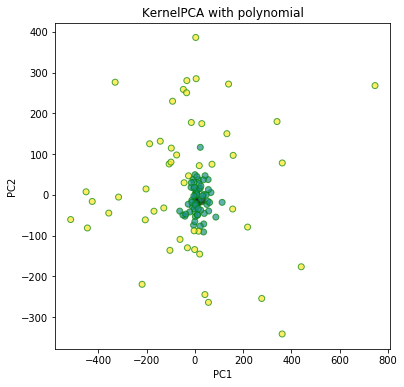

In [24]:
plt.figure(figsize=(6, 6))
plt.title("KernelPCA with polynomial")
plt.scatter(data4_kpca_poly[:,0],data4_kpca_poly[:,1], c=data4_label, edgecolor='g' , alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
################################
# Begin your code

# Kernel PCA for data4 with RBF-kernel + Visualization + PC1


kpca_rbf = KernelPCA(kernel = 'rbf', gamma=0.25)
data4_kpca_rbf = kpca_rbf.fit_transform(data4_data)

# End your code
################################

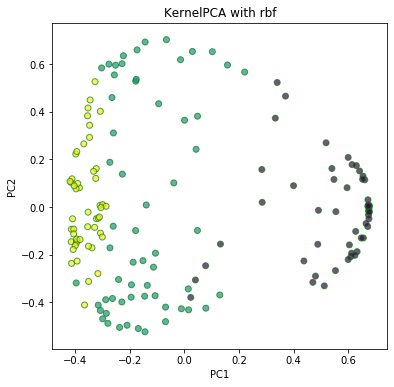

In [26]:
plt.figure(figsize=(6, 6))
plt.title("KernelPCA with rbf")
plt.scatter(data4_kpca_rbf[:,0],data4_kpca_rbf[:,1], c=data4_label, edgecolor='g' , alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<h3 style="color:rgb(0,120,170)">Task:</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


<h3 style="color:rgb(208,90,80)">Question (10 Points):</h3>

A major advantage of using Kernel PCA is to enable to capture nonlinear structure in a dataset compared to PCA without a kernel. With kernel PCA, it provides a better result of classification clustering which is not able to perform by PCA. However, Kernel PCA may cause a worse result due to overfitting. This experiment represents that using Kernel PCA is able to create clusters in multi-dimensional which returns a better performance of classification. 


The disadvantages of Kernel PCA is the limitation of interpretability and inverse mapping. Due to complex hyperparameters and high-dimensional mapping, the computational cost is normally higher than PCA. In this experiment, computation time of kernel PCA takes more time than non-kernl PCA model.
